In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
def display_annot(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=8, xytext=(0, 8),
                       textcoords='offset points')

In [3]:
def create_data_from_dauble_index_data_frame(df_or_src,col1,col2,col3,required_df_name):
    col1v = []
    col2v = []
    col3v = df_or_src.values.reshape(len(df_or_src))
    
    keys = df_or_src.index
    for i in range(len(keys)):
        col1v.append(keys[i][0])
        col2v.append(keys[i][1])
    
    
    required_df_name = pd.DataFrame({col1:col1v,col2:col2v,col3:col3v})
    
    return required_df_name

def create_data_from_dauble_keys_sires_frame(df_or_src,col1,col2,col3,required_df_name):
    col1v = []
    col2v = []
    col3v = df_or_src.values.reshape(len(df_or_src))
    
    keys = df_or_src.keys()
    for i in range(len(keys)):
        col1v.append(keys[i][0])
        col2v.append(keys[i][1])
    
    
    required_df_name = pd.DataFrame({col1:col1v,col2:col2v,col3:col3v})
    
    return required_df_name

In [4]:
def create_data_from_single_keys_sires_frame(df_or_src,col1,col3,required_df_name):
    col1v = []
    #col2v = []
    col3v = df_or_src.values.reshape(len(df_or_src))
    
    keys = df_or_src.keys()
    for i in range(len(keys)):
        col1v.append(keys[i])
        #col2v.append(keys[i][1])
    
    
    required_df_name = pd.DataFrame({col1:col1v,col3:col3v})
    
    return required_df_name

In [5]:
def per_cal(Df):
    
    _1st = Df.iloc[0,1]
    _2nd = Df.iloc[1,1]
    _1stv = Df.iloc[0,2]
    _2ndv = Df.iloc[1,2]
    
    per_1st = (_1stv*100)/(_1stv+_2ndv)
    per_2nd = (100-per_1st)
    
    return {_1st:per_1st,_2nd:per_2nd}

In [7]:
Df = pd.read_csv("hotel_bookings.csv")
Df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Converting reservation_status_date column object to Data_time and ## Droping unnessary column for this analysis

In [9]:
Df["reservation_status_date"] = pd.to_datetime(Df["reservation_status_date"])
Df.drop(['children', 'babies','required_car_parking_spaces'], axis = 1, inplace=True)
print(Df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  meal                            119390 non-null  object 

## Finding Droping and null values

#### Handeling Missing values

In [11]:
Df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
hotel                                  0
previous_cancellations                 0
reservation_status                     0
total_of_special_requests              0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [12]:
Df = Df.drop(['company','agent'],axis=1)
Df = Df.dropna()
Df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

#### After Handeling missing values there is no null values and missing values

In [13]:
Df.shape

(118902, 27)

# Handeling out liers

In [14]:
Df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.032010,0.087139,0.131629,0.221174,2.330676,102.000808,0.571706
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.176026,0.845855,1.484647,0.652775,17.630161,50.487004,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,5.000000


<AxesSubplot: xlabel='days_in_waiting_list'>

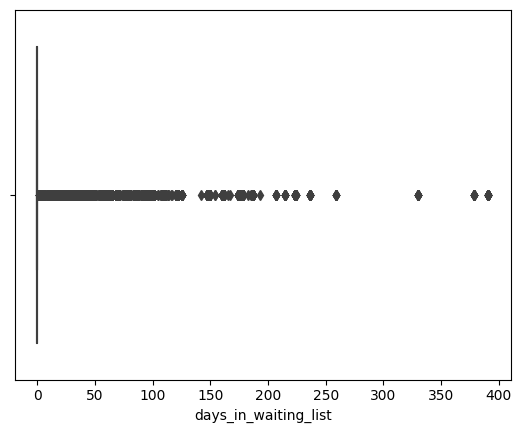

In [15]:
sns.boxplot(Df['days_in_waiting_list'])

In [16]:
Df[Df['days_in_waiting_list']>80]['days_in_waiting_list'].value_counts().sum()

1069

we can not remove more outliers becuase most of the value is 0


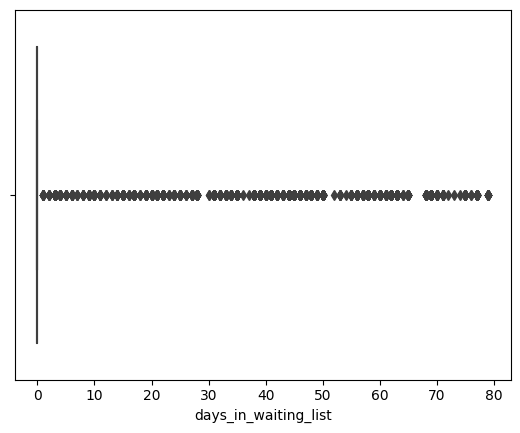

In [17]:
Df = Df[Df['days_in_waiting_list']<80]
sns.boxplot(Df['days_in_waiting_list'])
print('we can not remove more outliers becuase most of the value is 0')

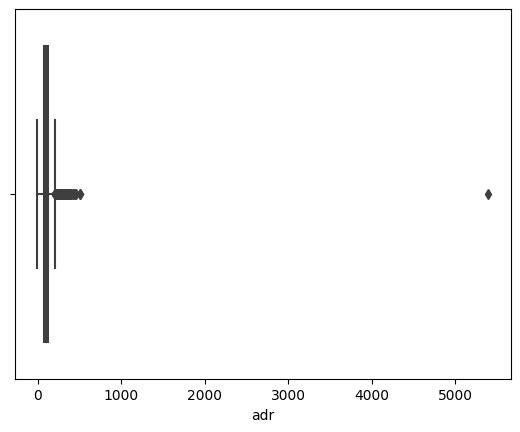

In [18]:
sns.boxplot(Df['adr'])
plt.show()

1239


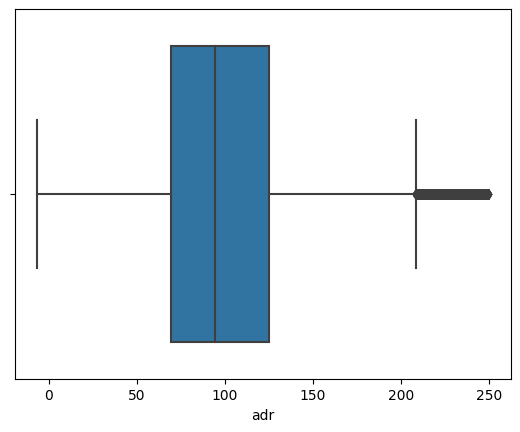

In [19]:
print(Df[Df['adr']>250]['adr'].value_counts().sum())
Df = Df[Df['adr']<250]
sns.boxplot(Df['adr'])
plt.show()

620


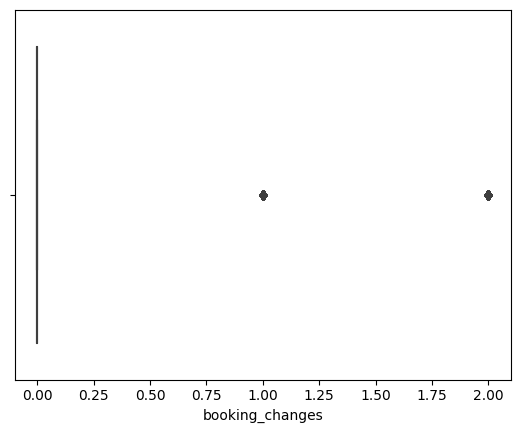

In [20]:
print(Df[Df['booking_changes']>3]['booking_changes'].value_counts().sum())
Df = Df[Df['booking_changes']<3]
sns.boxplot(Df['booking_changes'])
plt.show()

## Replacing column values

In [21]:
Df['is_canceled'].replace(0,'not_canceled', inplace=True)
Df['is_canceled'].replace(1,'canceled', inplace=True)
Df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,not_canceled,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,Check-Out,2015-07-02
3,Resort Hotel,not_canceled,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,Check-Out,2015-07-02
4,Resort Hotel,not_canceled,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,1,Check-Out,2015-07-03
5,Resort Hotel,not_canceled,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,1,Check-Out,2015-07-03
6,Resort Hotel,not_canceled,0,2015,July,27,1,0,2,2,...,C,C,0,No Deposit,0,Transient,107.0,0,Check-Out,2015-07-03


## Calculations of lost data during handeling missing value and outlier handeling

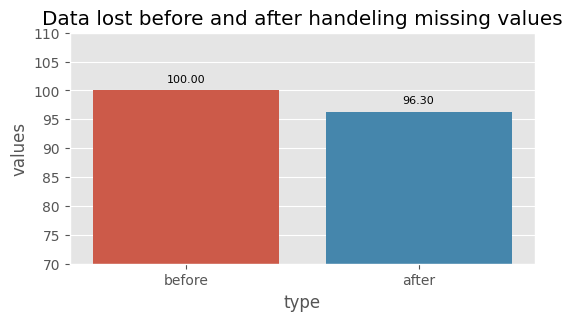

lost data after missing value handeling is 3.6962894714800285


In [22]:
OrigData = pd.read_csv('hotel_bookings.csv')
x = [0,0.1]
x_data = np.array(x)
y = [100,len(Df)*100/len(OrigData)]

plotable_df = pd.DataFrame({'type':['before','after'],'values':[100,len(Df)*100/len(OrigData)]})
plt.style.use('ggplot')
plt.figure(figsize=(6,3))
plt.title('Data lost before and after handeling missing values')

plots = sns.barplot(data=plotable_df,x='type',y='values')

display_annot(plots)
plt.ylim(50,102)

plt.ylim(70,110)
plt.show()
print("lost data after missing value handeling is", 100-len(Df)*100/len(OrigData))


## Hypothesis : Cancelation depends on Hotel Type
## Null hypothesis : Cancelation does not depends on Hotel Type

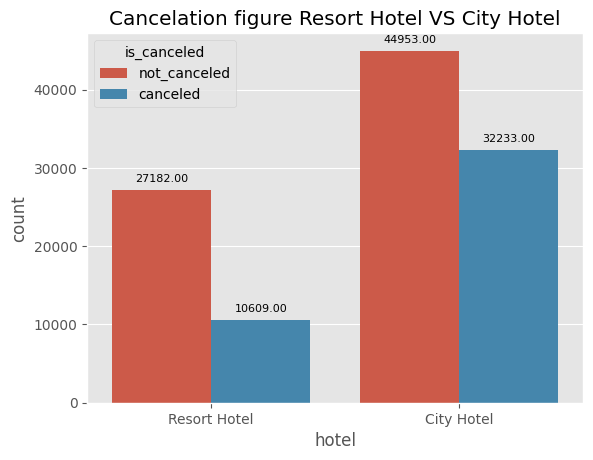

In [23]:
hotel_cat_df = Df[['hotel','is_canceled']]

plots = sns.countplot(data=hotel_cat_df,x='hotel', hue='is_canceled')
plt.title("Cancelation figure Resort Hotel VS City Hotel")
display_annot(plots)
    
plt.show()

### Our hypothesis in proved here : cancelation depends on hotel type
#### Need to determine the causes and give proper solutions

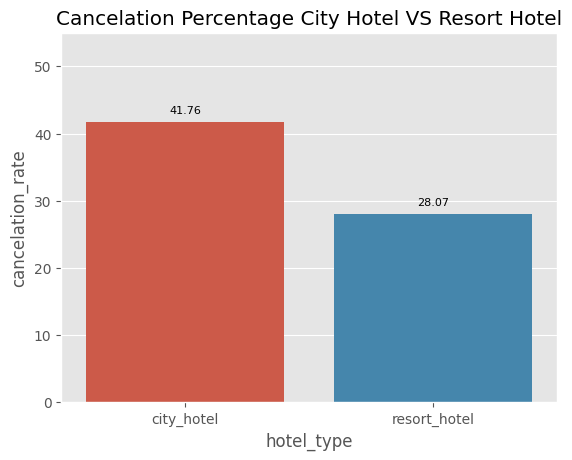

In [24]:
values = list(hotel_cat_df.value_counts().values)

city_hotel_can_percentage = (values[1]*100)/(values[0]+values[1])
resort_hotel_can_percentage = (values[3]*100)/(values[2]+values[3])

cancelation_rate = [city_hotel_can_percentage,resort_hotel_can_percentage]

hotel_type = ['city_hotel','resort_hotel']
ploting_df = pd.DataFrame({"hotel_type":hotel_type,'cancelation_rate':cancelation_rate})

plt.title('Cancelation Percentage City Hotel VS Resort Hotel')
plots = sns.barplot(data=ploting_df, x='hotel_type', y='cancelation_rate')

plt.ylim(0,55)
display_annot(plots)
plt.show()

#### From those above graps we can clearly see that city hotel has more cancelation rate than resort hotel need to find out the reason maybe the price is the reason lets findout

In [25]:
# Data frames that will use in further analysis
city_hotel_main = Df[Df['hotel'] == 'City Hotel']
resort_hotel_main = Df[Df['hotel'] == 'Resort Hotel']

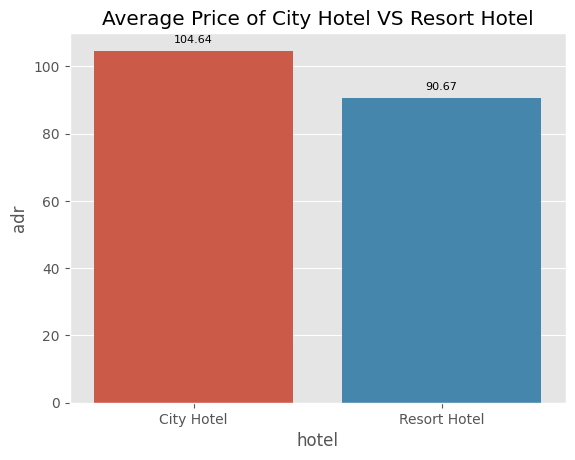

In [26]:
new_df = Df[['hotel','adr']]
newDF = new_df.groupby(by =['hotel'])[['adr']].mean()

plt.title("Average Price of City Hotel VS Resort Hotel")
plots = sns.barplot(x=newDF.index,y=newDF['adr'])

display_annot(plots)

plt.show()

####  as we can see price can effect cancelation rate 
#### Sol1) Give some discounts to city hotel customer

In [27]:
city_hotel = city_hotel_main[['reservation_status_date','adr','is_canceled']]

city_hotel['month'] = city_hotel['reservation_status_date'].dt.month

city_hotel['year'] = city_hotel['reservation_status_date'].dt.year

city_hotel['day'] = city_hotel['reservation_status_date'].dt.day

resort_hotel =resort_hotel_main[['reservation_status_date','adr','is_canceled']]

resort_hotel['month'] =resort_hotel['reservation_status_date'].dt.month

resort_hotel['year'] =resort_hotel['reservation_status_date'].dt.year

resort_hotel['day'] = resort_hotel['reservation_status_date'].dt.day

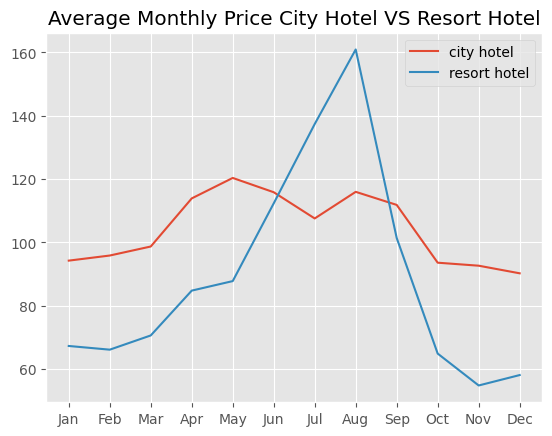

In [28]:
city_hotel_day_grpby = city_hotel.groupby('month')[['adr']].mean()
plt.plot(city_hotel_day_grpby.index,city_hotel_day_grpby['adr'])

resort_hotel_day_grpby = resort_hotel.groupby('month')[['adr']].mean()

plt.title("Average Monthly Price City Hotel VS Resort Hotel")
plt.plot(resort_hotel_day_grpby.index,resort_hotel_day_grpby['adr'])

month_list = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=month_list)
plt.legend(["city hotel", "resort hotel"])
plt.show()

In [29]:
city_can_by_month = city_hotel[['is_canceled','month']]
city_can_by_month = city_can_by_month[city_can_by_month['is_canceled'] == 'canceled']
city_can_by_month = city_can_by_month['month']
str_obj = city_can_by_month.value_counts()

city_plott_data_c = create_data_from_single_keys_sires_frame(str_obj,'month','value_c','DataF').sort_values(by = 'month')

city_can_not_by_month = city_hotel[['is_canceled','month']]
city_can_not_by_month = city_can_not_by_month[city_can_not_by_month['is_canceled'] == 'not_canceled']
city_can_not_by_month = city_can_not_by_month['month']
str_obj2 = city_can_not_by_month.value_counts()

city_plott_data_not_c = create_data_from_single_keys_sires_frame(str_obj2,'month','value_not_c','DataF').sort_values(by = 'month')

city_plott_data_c['value_not_c'] = city_plott_data_not_c['value_not_c']

city_plott_data_c['can_rate'] = (city_plott_data_c['value_c']*100)/(city_plott_data_c['value_c']+city_plott_data_c['value_not_c'])



resort_can_by_month = resort_hotel[['is_canceled','month']]
resort_can_by_month = resort_can_by_month[resort_can_by_month['is_canceled'] == 'canceled']
resort_can_by_month = resort_can_by_month['month']
str_obj = resort_can_by_month.value_counts()

resort_plott_data_c = create_data_from_single_keys_sires_frame(str_obj,'month','value_c','DataF').sort_values(by = 'month')

resort_can_not_by_month = resort_hotel[['is_canceled','month']]
resort_can_not_by_month = resort_can_not_by_month[resort_can_not_by_month['is_canceled'] == 'not_canceled']
resort_can_not_by_month = resort_can_not_by_month['month']
str_obj2 = resort_can_not_by_month.value_counts()

resort_plott_data_not_c = create_data_from_single_keys_sires_frame(str_obj2,'month','value_not_c','DataF').sort_values(by = 'month')

resort_plott_data_c['value_not_c'] = resort_plott_data_not_c['value_not_c']

resort_plott_data_c['can_rate'] = (resort_plott_data_c['value_c']*100)/(resort_plott_data_c['value_c']+resort_plott_data_c['value_not_c'])


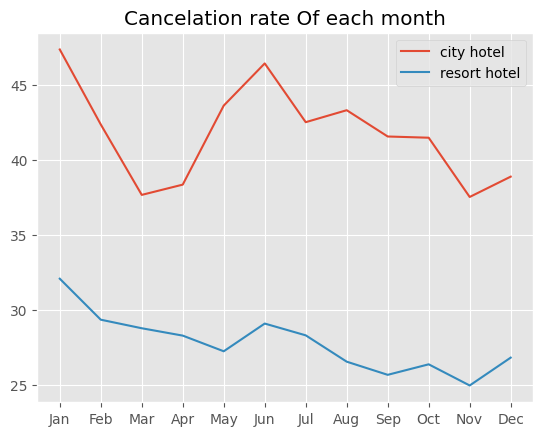

In [30]:
plt.title("Cancelation rate Of each month")

plt.plot(city_plott_data_c['month'],city_plott_data_c['can_rate'])
plt.plot(resort_plott_data_c['month'],resort_plott_data_c['can_rate'])


month_list = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=month_list)
plt.legend(["city hotel", "resort hotel"])
plt.show()

#### From the above graph we can see the during june to sept Resort Hotel have higher price becuase of summer season we can call this time spand as pick time. we can keep high the price during that time but before this we need to check cancelation rate of pick time vs off time

In [31]:
pick_time = resort_hotel[resort_hotel['month'].isin([6,7,8,9])]
off_time = resort_hotel[resort_hotel['month'].isin([1,2,3,4,5,10,11,12])]

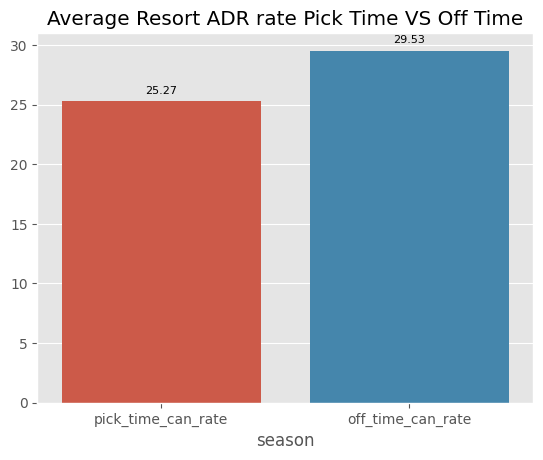

In [32]:
pick_time_list = list(pick_time['is_canceled'].value_counts().values)
off_time_list = list(off_time['is_canceled'].value_counts().values)

pick_time_can_rate = (pick_time_list[1]*100)/(pick_time_list[1]+pick_time_list[0])

off_time_can_rate = (off_time_list[1]*100)/(off_time_list[1]+off_time_list[0])

index = ['pick_time_can_rate','off_time_can_rate']
values = [pick_time_can_rate,off_time_can_rate]

plotting_data = pd.DataFrame({'season':index,'avg rate':values})

plt.title("Average Resort ADR rate Pick Time VS Off Time")
plots = sns.barplot(data=plotting_data, x='season',y=values)
display_annot(plots)
plt.show()

#### pick time cancelartion rate is low by about 4% so we can add some extra to the price to get profitable 
#### The losses by giving discounts to the 'City Hotel' Customer can be recovered from the 'Resort Hotel' Customer During Pick Time

# Hypothesis :  waiting list has an effect on cancelation rate
# Null hypothesis : waiting list has an no effect on cancelation rate

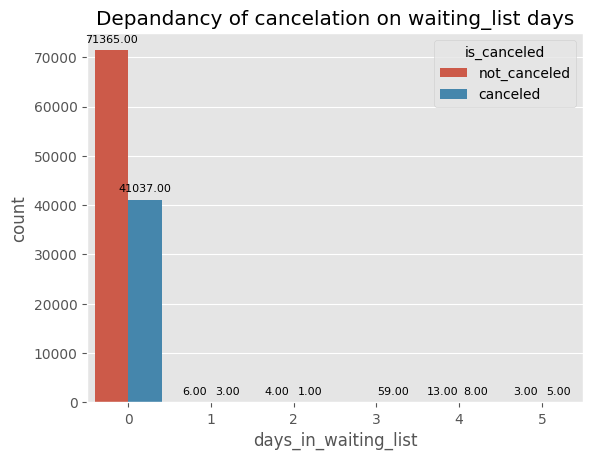

In [33]:
WaitDf = Df[['days_in_waiting_list', 'is_canceled']]
WaitDf.is_canceled.replace(0,'not canceled',inplace=True)
WaitDf.is_canceled.replace(1,'canceled', inplace=True)

WaitDf = WaitDf[WaitDf.days_in_waiting_list < 6]

plt.title('Depandancy of cancelation on waiting_list days')
plots = sns.countplot(data=WaitDf , x = 'days_in_waiting_list', hue='is_canceled' )
display_annot(plots)
plt.show()

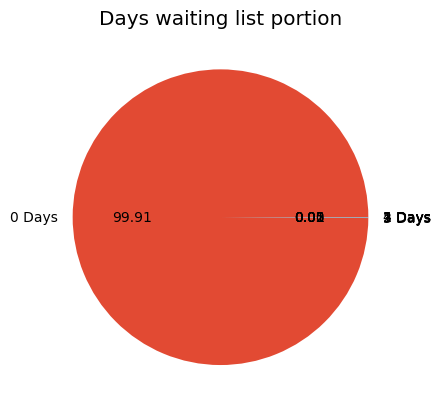

In [34]:
pie_val = WaitDf['days_in_waiting_list'].value_counts()
labels = list(WaitDf['days_in_waiting_list'].value_counts().keys())
Labels = [str(i)+" Days" for i in labels]

plt.title('Days waiting list portion')
plt.pie(pie_val,labels=Labels,autopct='%.2f')
plt.show()

### From those above graphs we can conclude that our Null hypothesis is right

## Hypothesis : Cancelation rate is depandandant on meal
## Null hypothesis : Cancelation rate is not depandandant on meal

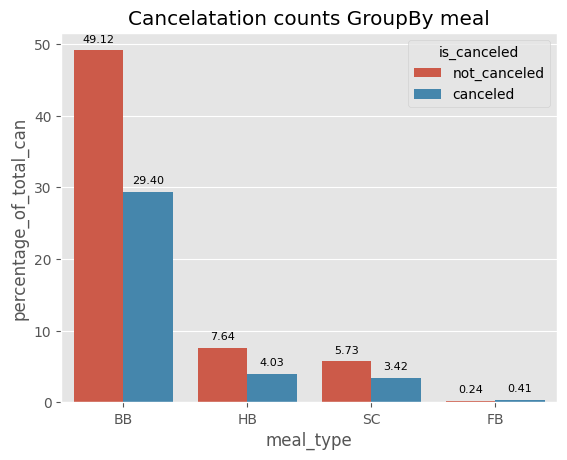

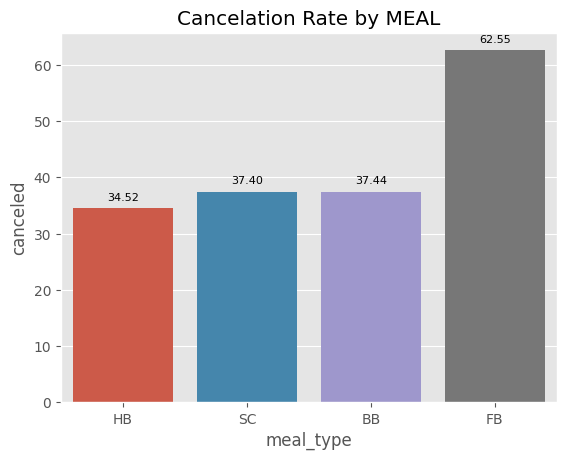

In [35]:
meal_df = Df[['meal','is_canceled']]

meal_df.replace('Undefined',meal_df['meal'].mode()[0], inplace=True)

plt.title("Cancelatation counts GroupBy meal")

srcobj = meal_df.value_counts(normalize=True)*100

meal_df_by_per = create_data_from_dauble_keys_sires_frame(srcobj,'meal_type','is_canceled', 'percentage_of_total_can','DataF')

plots = sns.barplot(data = meal_df_by_per, x = 'meal_type' , y ='percentage_of_total_can', hue='is_canceled')
display_annot(plots)
plt.show()

BB = meal_df_by_per[meal_df_by_per['meal_type'] == 'BB']
HB = meal_df_by_per[meal_df_by_per['meal_type'] == 'HB']
SC = meal_df_by_per[meal_df_by_per['meal_type'] == 'SC']
FB = meal_df_by_per[meal_df_by_per['meal_type'] == 'FB']

BB_d = per_cal(BB)
HB_d = per_cal(HB)
SC_d = per_cal(SC)
FB_d = per_cal(FB)

plot_data = pd.DataFrame([BB_d,HB_d,SC_d,FB_d],index=['BB','HB','SC','FB']).transpose()

meal_type = ['BB','BB','HB','HB','SC','SC','FB','FB']
is_canceled = ['not_canceled','canceled','not_canceled','canceled','not_canceled','canceled','not_canceled','canceled']

canceled = list(plot_data.transpose()['canceled'].values)
meal_type = ['BB','HB','SC','FB']
plot_dataf = pd.DataFrame({'canceled':canceled,'meal_type':meal_type})
plot_dataf = plot_dataf.sort_values(by='canceled')
plt.title("Cancelation Rate by MEAL")
plots = sns.barplot(data=plot_dataf,x='meal_type',y='canceled')
display_annot(plots)
plt.show()

### From those above graphs we can conclude that our hypothesis is right. 
#### Solution derived from hypothesis - 1) Company should add more and more 'HB' meal type to the booking package to reduce cancelation rate

## Hypothesis : cancelation is any country specific
## Null hypothesis : cancelation is not any country specific

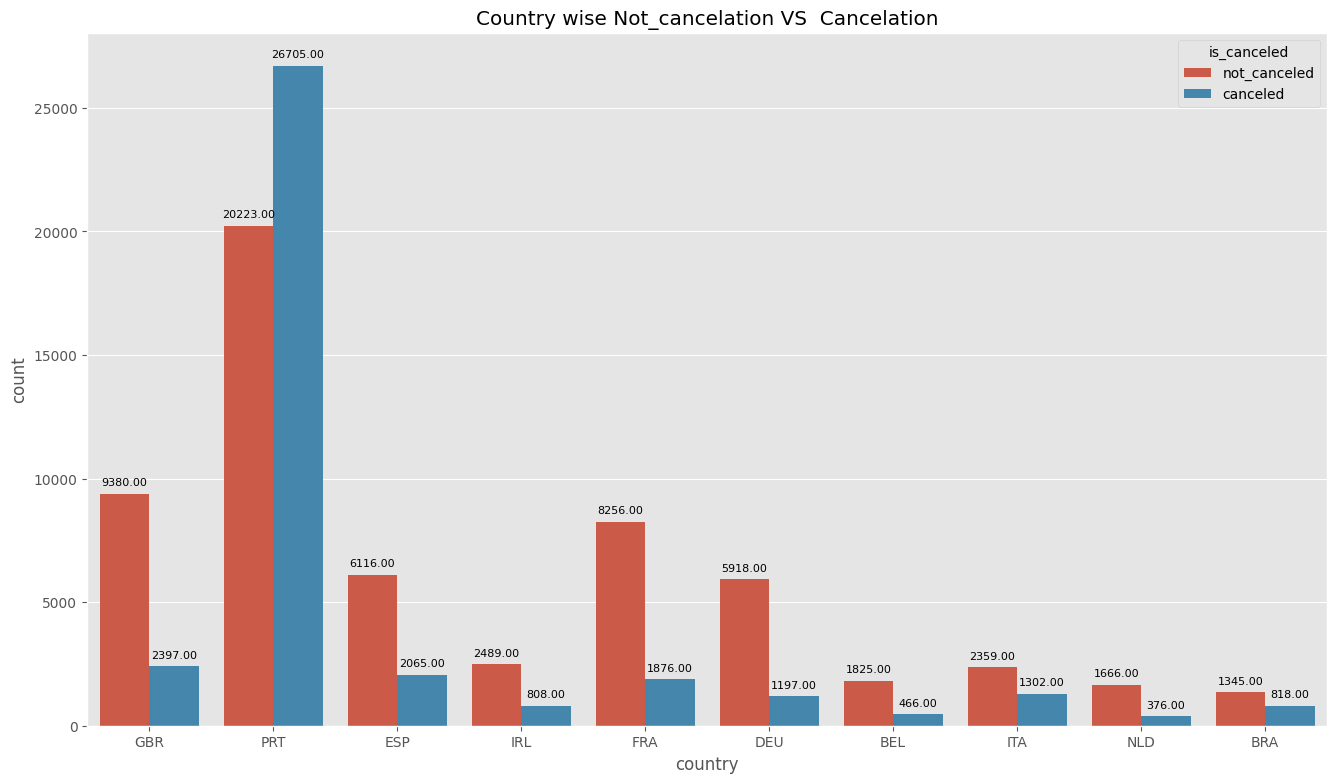

In [36]:
top_10_country_value = Df['country'].value_counts().keys()[:10]
country_df_demo = Df[['country','is_canceled']]
country_df = country_df_demo[country_df_demo['country'].isin(top_10_country_value)]

plt.figure(figsize=(16,9))
plt.title("Country wise Not_cancelation VS  Cancelation")
plots = sns.countplot(data=country_df,x='country', hue='is_canceled')
display_annot(plots)

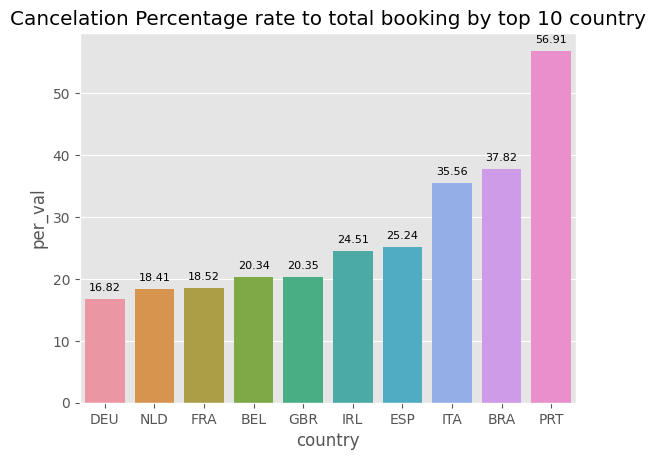

In [37]:
top_10_country_whose_have_most_record = top_10_country_value
country_df = Df[['country','is_canceled']]
country_df = country_df[country_df['country'].isin(top_10_country_whose_have_most_record)]
country_df_grp_by_can_count = country_df.groupby(['country','is_canceled'])['is_canceled'].count()
country_df_grp_by_can_count

country = []
is_canceled = []
keys = country_df_grp_by_can_count.keys()
for i in range(len(keys)):
    country.append(keys[i][0])
    is_canceled.append(keys[i][1])
    
values = country_df_grp_by_can_count.values

countryf = country[::2]
cancel = values[::2]
not_can = values[1::2]

per_val = []
for i in range(len(countryf)):
    v = cancel[i]*100/(cancel[i]+not_can[i])
    per_val.append(v)
per_val

can_rate_by_per = pd.DataFrame({'country':countryf,'per_val':per_val}).sort_values(by=['per_val'])

plt.title('Cancelation Percentage rate to total booking by top 10 country')
plots = sns.barplot(data=can_rate_by_per,x = 'country', y='per_val')

display_annot(plots)

### Our hypothesis is right portugal have the highest rate of cancelation which is more than the not canceled booking
#### Need to find out the causes
##### Hypothesis: Price is effecting the cancelation rate for portugal
##### Null hypothesis : Price has no effect on cancelation for portugal

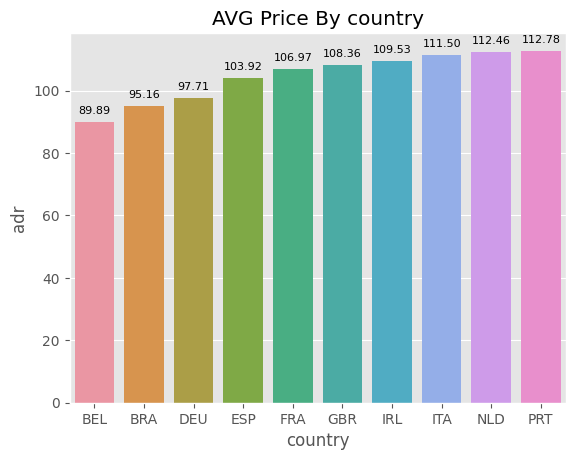

In [38]:
adr_by_country = Df[['country','adr']]
adr_of_top_10_country = adr_by_country[adr_by_country['country'].isin(top_10_country_whose_have_most_record)]
avg_rate_by_country = adr_of_top_10_country.groupby('country')[['adr']].mean()
plots = sns.barplot(data=avg_rate_by_country.sort_values(by = ['adr']),x=avg_rate_by_country.index,y='adr')
plt.title("AVG Price By country")
display_annot(plots)

### Our Hypothesis is correct 'PRT' have the higest avg rate:
#### solutions :1) Adr rate for potugal should br some extend to reduce cancilation rate 
#### solutions:2) Nedd more analysis on 'PRT' but the data is not sufficient 

## Hypothesis: Cancelation is depended in deposit_type
## Null Hypothesis : Cancelation is not depended in deposit_type

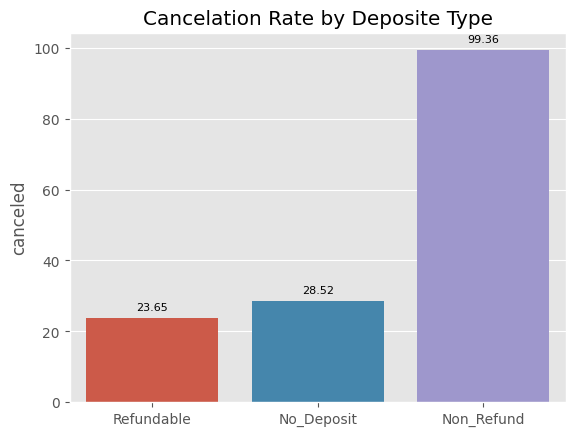

In [39]:
depositetype = Df[['deposit_type','is_canceled']]
str_obj = depositetype.value_counts()

DataF = create_data_from_dauble_keys_sires_frame(str_obj,'deposit_type','is_canceled','value_counts','DataF')

Refundable = DataF[DataF['deposit_type'] == 'Refundable']
No_Deposit = DataF[DataF['deposit_type'] == 'No Deposit']
Non_Refund = DataF[DataF['deposit_type'] == 'Non Refund']

RefundableD = per_cal(Refundable)
No_DepositD = per_cal(No_Deposit)
Non_RefundD = per_cal(Non_Refund)
dep_type_grp = pd.DataFrame([RefundableD,No_DepositD,Non_RefundD],index=['Refundable','No_Deposit','Non_Refund'])

plt.title('Cancelation Rate by Deposite Type')

plots = sns.barplot(data=dep_type_grp,x=dep_type_grp.index,y='canceled')
display_annot(plots)

plt.show()

## Hypothesis is proved right here
#### Solutions: Since non refundable doesnot include any loses we can exclude it from our calculations refundable bookings have low rate of cancelation we need to make most of the booking refundable rather that No_Deposite

# Hypothesis : Cancelation rate is depended customer_type

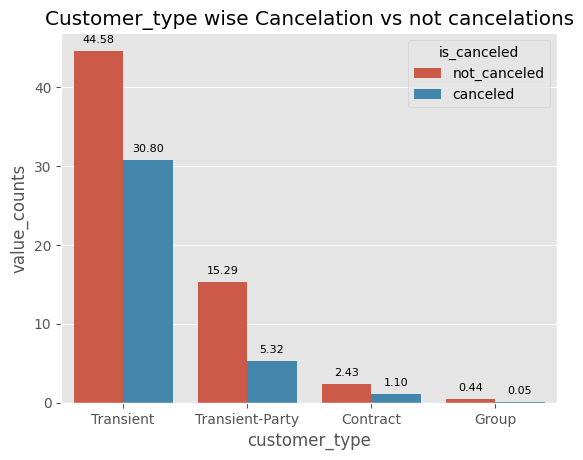

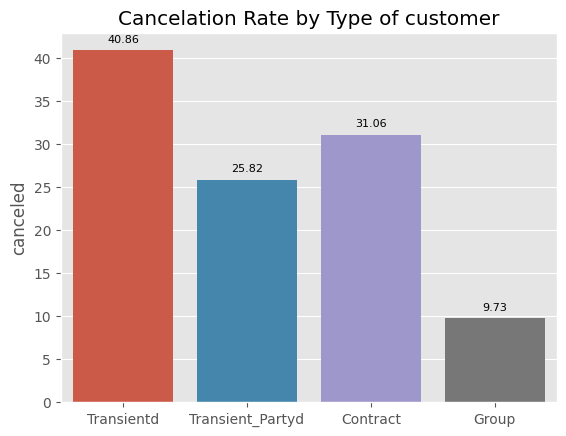

In [40]:
customer_type= Df[['customer_type', 'is_canceled']]
str_obj = customer_type.value_counts(normalize=True)*100
plot_dataf = create_data_from_dauble_keys_sires_frame(str_obj,'customer_type','is_canceled','value_counts','DataF')

plt.title('Customer_type wise Cancelation vs not cancelations')
plots = sns.barplot(data=plot_dataf,x='customer_type', y='value_counts',hue='is_canceled')
display_annot(plots)
plt.show()


Transient = plot_dataf[plot_dataf['customer_type'] == 'Transient']
Transient_Party = plot_dataf[plot_dataf['customer_type'] == 'Transient-Party']
Contract = plot_dataf[plot_dataf['customer_type'] == 'Contract']
Group = plot_dataf[plot_dataf['customer_type'] == 'Group']

Transientd = per_cal(Transient)
Transient_Partyd = per_cal(Transient_Party)
Contractd = per_cal(Contract)
Groupd = per_cal(Group)

dep_type_grp = pd.DataFrame([Transientd,Transient_Partyd,Contractd,Groupd],index=['Transientd','Transient_Partyd','Contract','Group'])

plt.title('Cancelation Rate by Type of customer')

plots = sns.barplot(data=dep_type_grp,x=dep_type_grp.index,y='canceled')
display_annot(plots)

plt.show()

### Our hypothesis is correct 
#### Solutions: Trancient and contract Customer have more trend to do cancel give them good offer to prevent cancelation

## Hypothesis : Cancelation rate is depended Market_Segment

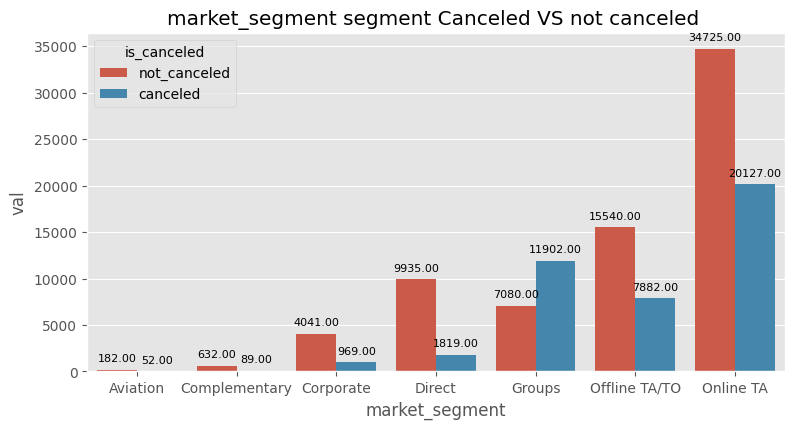

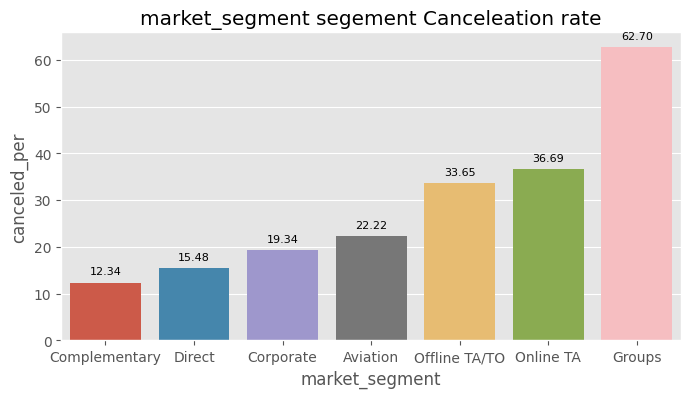

In [41]:
market_segement = Df[['market_segment','is_canceled']]
src_obj = market_segement.value_counts()

market_segement_grp_by = create_data_from_dauble_keys_sires_frame(src_obj,'market_segment','is_canceled','val',
                                                           'DatF').sort_values(by = 'market_segment')

market_segement_grp_by = market_segement_grp_by[market_segement_grp_by['market_segment'] != 'Undefined']

plt.figure(figsize=(9,4.4))
plots = sns.barplot(data=market_segement_grp_by,x='market_segment',y='val',hue='is_canceled')
plt.title('market_segment segment Canceled VS not canceled ',)
display_annot(plots)

plt.show()

canceled = market_segement_grp_by[market_segement_grp_by.is_canceled == 'canceled']

not_canceled = market_segement_grp_by[market_segement_grp_by.is_canceled == 'not_canceled']
not_canceled.columns

market_segment = canceled.market_segment.values
canceled_val = canceled.val.values
not_canceled_val = not_canceled.val.values

cal_df = pd.DataFrame({'market_segment':market_segment,'canceled_val':canceled_val,'not_canceled_val':not_canceled_val})

cal_df['canceled_per'] = (cal_df['canceled_val']*100)/(cal_df['not_canceled_val']+cal_df['canceled_val'])

cal_df.sort_values(by='canceled_per',inplace=True)

plt.figure(figsize=(8,4))
plots = sns.barplot(data=cal_df,x='market_segment',y='canceled_per')
plt.title('market_segment segement Canceleation rate',)
display_annot(plots)

plt.show()

### From the above data our hypothesis is right cancelation rate depends on Market Segments
####  Suggestions : Since group have more than 50% Cancelation rate so keep group booking in waiting not to confirm early arrange them rooms at last momments when they are physically present

# Conclution
#### By implementing these strategies, we expect to reduce the cancellation rate, increase occupancy rates, and ultimately improve the company's profitability. It is important to continuously monitor and evaluate the effectiveness of these strategies and adjust them accordingly to ensure their success. Along with this strategy company need to focus to improve guest servicing experience and organise some event to make memorable of guest moment.
